<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

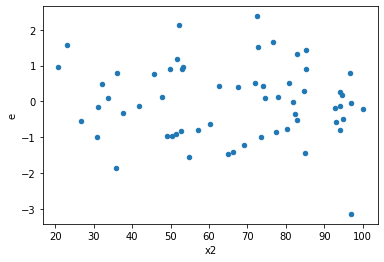

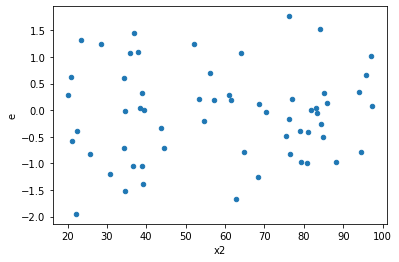

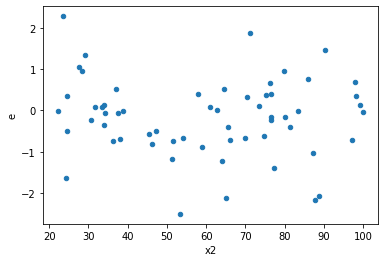

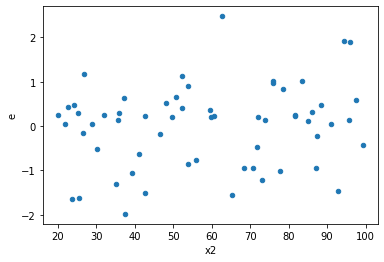

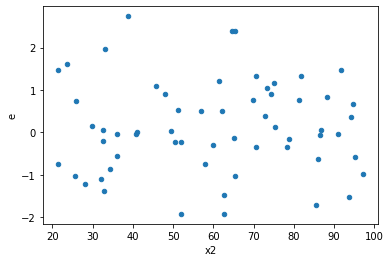

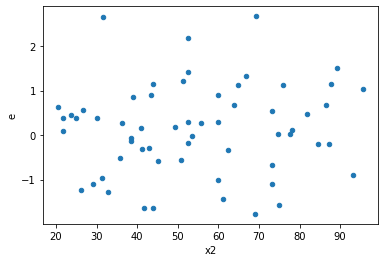

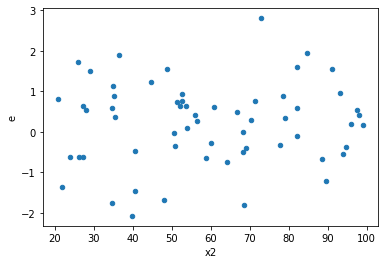

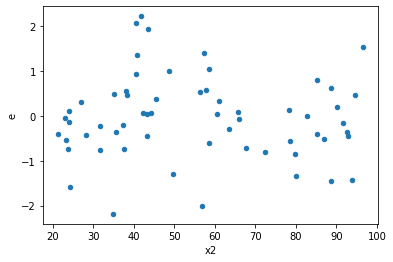

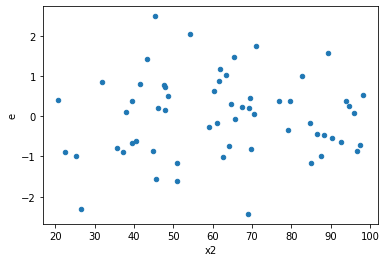

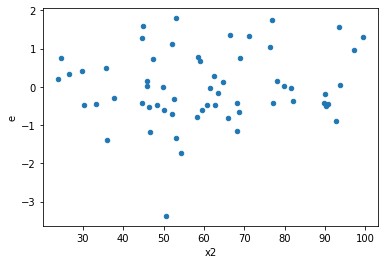

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,32.0,22.0,25.544042919535823,18.133269306538963,0.7982513412354945,0.8242395139335893,1.032556378368086,0.9548305423264529,0.5225847288367735,0.47741527116322646,Reject005=1 : Homoscedasticity
4.0,29.0,25.0,23.10247352817641,24.420447890242436,0.7966370182129797,0.9768179156096974,1.2261769077727525,0.6085916287568969,0.6957041856215516,0.30429581437844844,Reject005=1 : Homoscedasticity
5.0,25.0,29.0,15.31921274422937,47.90225055088584,0.6127685097691749,1.6518017431339944,2.6956374500318487,0.01122692047833862,0.9943865397608307,0.00561346023916931,Reject005=0 : Heteroscedasticity
6.0,30.0,24.0,26.34511005276568,23.948674117151075,0.8781703350921893,0.9978614215479614,1.1362959800312624,0.7553770794688552,0.6223114602655724,0.3776885397344276,Reject005=1 : Homoscedasticity
7.0,28.0,26.0,17.214662278278922,18.115700307145634,0.6148093670813901,0.6967577041209859,1.1332906449174958,0.7514438742367313,0.6242780628816343,0.37572193711836566,Reject005=1 : Homoscedasticity
9.0,16.0,38.0,14.391685085416784,46.450301435134655,0.899480317838549,1.2223763535561751,1.3589806572905845,0.42831200363374866,0.7858439981831257,0.21415600181687433,Reject005=1 : Homoscedasticity
11.0,30.0,24.0,19.632705686702984,17.11938353970024,0.6544235228900994,0.7133076474875101,1.0899786186434184,0.8371076146196705,0.5814461926901647,0.41855380730983527,Reject005=1 : Homoscedasticity
12.0,17.0,37.0,13.081222552130107,32.59613780291067,0.7694836795370651,0.880976697375964,1.144893284684056,0.7058841275006398,0.6470579362496801,0.3529420637503199,Reject005=1 : Homoscedasticity
16.0,35.0,19.0,32.37396428356906,22.115329951665267,0.9249704081019731,1.1639647342981718,1.258380510449639,0.6044957866724294,0.6977521066637853,0.3022478933362147,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,32.0,27.51266998838185,28.368855383303234,1.2505759085628114,0.8865267307282261,0.7088947777244818,0.40382378134753716,Reject005=1 : Homoscedasticity
1.0,21.0,33.0,28.519456696953224,24.025574712475702,1.3580693665215822,0.7280477185598697,0.5360902296357773,0.13645600157248006,Reject005=1 : Homoscedasticity
2.0,26.0,28.0,26.6256520974144,23.15845146489764,1.024063542208246,0.8270875523177729,0.8076525705956461,0.5867847833892416,Reject005=1 : Homoscedasticity
3.0,32.0,22.0,25.544042919535823,18.133269306538963,0.7982513412354945,0.8242395139335893,1.032556378368086,0.9548305423264529,Reject005=1 : Homoscedasticity
4.0,29.0,25.0,23.10247352817641,24.420447890242436,0.7966370182129797,0.9768179156096974,1.2261769077727525,0.6085916287568969,Reject005=1 : Homoscedasticity
5.0,25.0,29.0,15.31921274422937,47.90225055088584,0.6127685097691749,1.6518017431339944,2.6956374500318487,0.01122692047833862,Reject005=0 : Heteroscedasticity
6.0,30.0,24.0,26.34511005276568,23.948674117151075,0.8781703350921893,0.9978614215479614,1.1362959800312624,0.7553770794688552,Reject005=1 : Homoscedasticity
7.0,28.0,26.0,17.214662278278922,18.115700307145634,0.6148093670813901,0.6967577041209859,1.1332906449174958,0.7514438742367313,Reject005=1 : Homoscedasticity
8.0,26.0,28.0,25.614050071796512,25.655147725569012,0.9851557719921735,0.916255275913179,0.9300613181815253,0.8558774450971649,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      944
Reject005=0 : Heteroscedasticity     56
Name: Result_test, dtype: int64